# **Scikit-Learn 기반 회귀분석**

In [1]:
# 사용할 라이브러리 불러오기
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## **Scikit-Learn 라이브러리 불러오기**


In [2]:
import sklearn

### 라이브러리 버전 확인

In [3]:
sklearn.__version__

'1.6.1'

## **회귀분석 Dataset 불러오기**


In [4]:
from sklearn import datasets

In [5]:
data = datasets.load_diabetes(as_frame=True)

### 독립변수 및 종속변수 할당

In [6]:
x, y = data.data, data.target

#### 독립변수 Column 확인

In [7]:
input_feat = x.columns
print(input_feat)

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')


## **데이터 전처리 진행**

### Min-Max Normalization 진행

In [8]:
from sklearn.preprocessing import MinMaxScaler

### **Scikit-Learn 모듈 특성**



1.   Class Instance 생성
2.   fit() Method 실행
3.   transform() Method 실행



In [9]:
x, y = np.array(x), np.array(y) # Numpy Array 자료 구조로 변환

#### 독립변수 전처리 진행

In [10]:
mm_scaler_x = MinMaxScaler()
mm_scaler_x.fit(x)
x = mm_scaler_x.transform(x) # Min-Max Normalization 적용

#### 종속변수 전처리 진행

In [11]:
mm_scaler_y = MinMaxScaler()
mm_scaler_y.fit(y.reshape(-1, 1)) # 1차원에서 2차원으로 차원 증가
y = mm_scaler_y.transform(y.reshape(-1, 1)).reshape(-1) # 2차원에서 1차원으로 차원 축소

## **Dataset 샘플링 진행**

### Scikit-Learn의 **train_test_split** 활용

In [12]:
from sklearn.model_selection import train_test_split

#### Dataset을 나누는 비율과 Shuffling후 일정한 결과를 얻기 위한 Seed 입력

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [14]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(309, 10) (309,)
(133, 10) (133,)


## **다중 선형 회귀분석 비교**

In [15]:
def get_param(x: np.array, y: np.array) :
  x_t = np.transpose(x)
  output = np.matmul(np.matmul(np.linalg.inv(np.matmul(x_t, x)), x_t), y)

  return output

In [16]:
beta_hat = get_param(x_train, y_train)

In [17]:
y_test_hat = np.matmul(x_test, beta_hat)

### **다중 선형 회귀 모델의 정성적 및 정량적 평가 진행**

In [18]:
def plot_bar_chart(y_test, y_test_hat) :
  fig, ax = plt.subplots(figsize=(20,10))
  idx = np.asarray([i for i in range(50)])
  width = 0.2

  ax.bar(idx, y_test[:50], width=width)
  ax.bar(idx+width, y_test_hat[:50], width=width)
  ax.set_xticks(idx)
  ax.legend(["Ground Truth", "Prediction"])
  ax.set_xlabel("# samples")
  ax.set_ylabel("Value")

  fig.tight_layout()
  plt.show()

In [19]:
def RMSE(y_hat:np.array, y:np.array) :
  output = np.sqrt(np.mean(np.power(y - y_hat, 2)))

  return output

#### 원래 차원으로 복원하기 위핸 Affine Transformation 진행

In [20]:
y_test = mm_scaler_y.inverse_transform(y_test.reshape(-1, 1)).reshape(-1)
y_test_hat = mm_scaler_y.inverse_transform(y_test_hat.reshape(-1, 1)).reshape(-1)

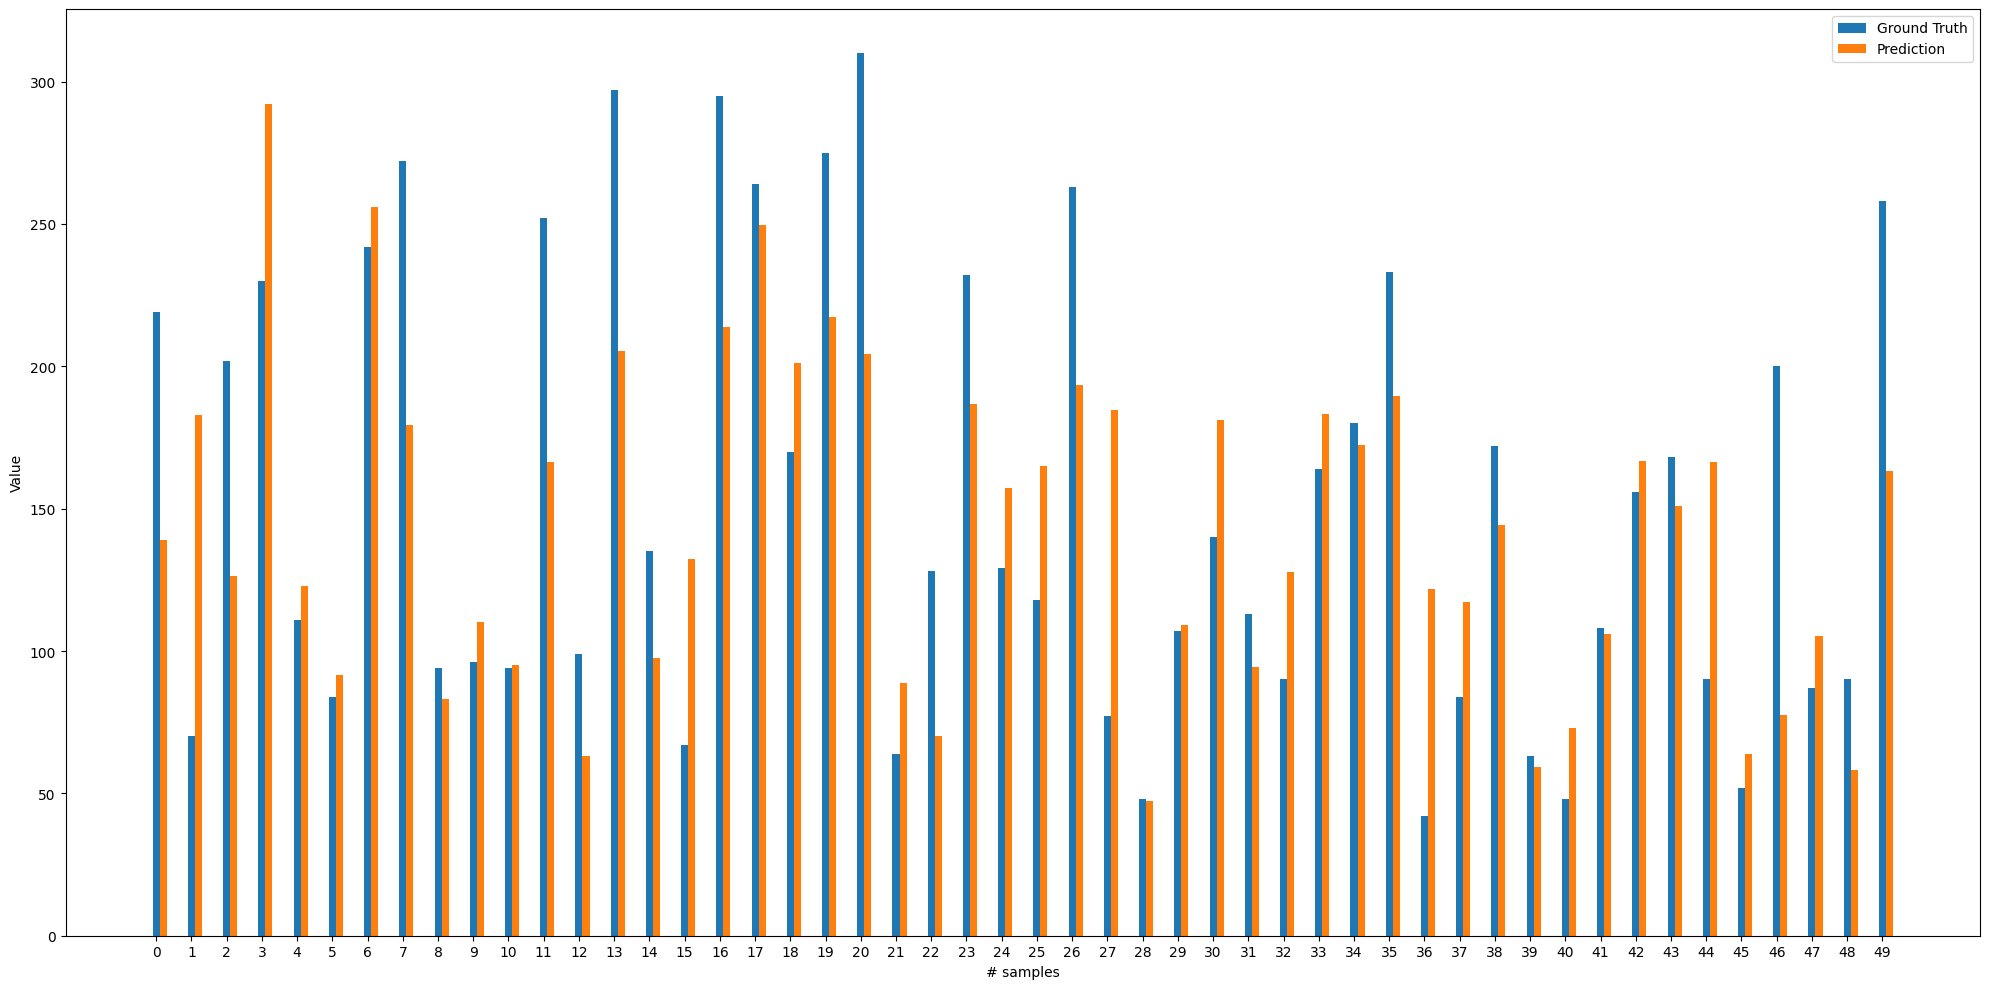

In [21]:
plot_bar_chart(y_test, y_test_hat)

In [22]:
RMSE(y_test_hat, y_test)

np.float64(53.193987595196134)

## **의사 결정 트리 기반 회귀분석**

### Scikit-Learn의 **DecisionTreeRegressor** 활용

In [23]:
from sklearn.tree import DecisionTreeRegressor



1.   Class Instance 생성
2.   fit() Method 실행
3.   predict() Method 실행



In [24]:
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(x_train, y_train)
y_test_hat = dt_reg.predict(x_test)

### **입력 피처 (독립변수) 중요도 확인**

#### Seaborn 라이브러리 활용

In [25]:
import seaborn as sns

In [26]:
def vis_importances(data:pd.Series) :
  plt.figure(figsize=(8,6))
  plt.title("Feature Importances")
  plt.xlabel("Importance")
  plt.ylabel("Feature")
  sns.barplot(x=data, y=data.index)
  plt.show()

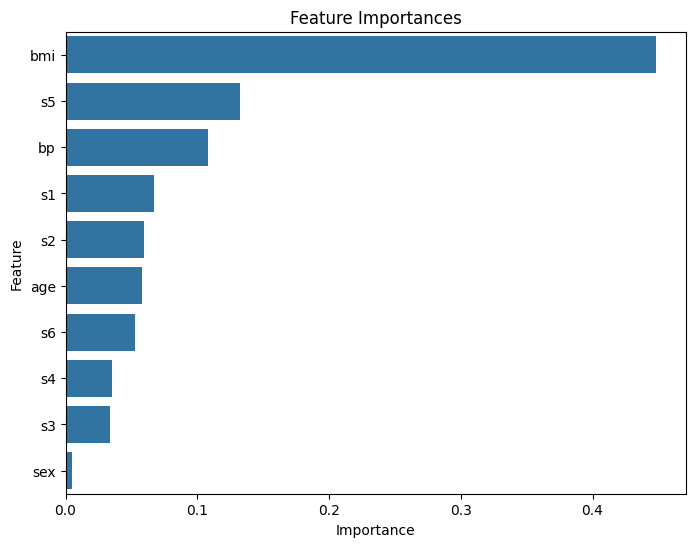

In [27]:
vis_importances(pd.Series(dt_reg.feature_importances_, index=input_feat).sort_values(ascending=False))

#### **Decision Tree의 Component 시각화**

In [28]:
from sklearn.tree import plot_tree

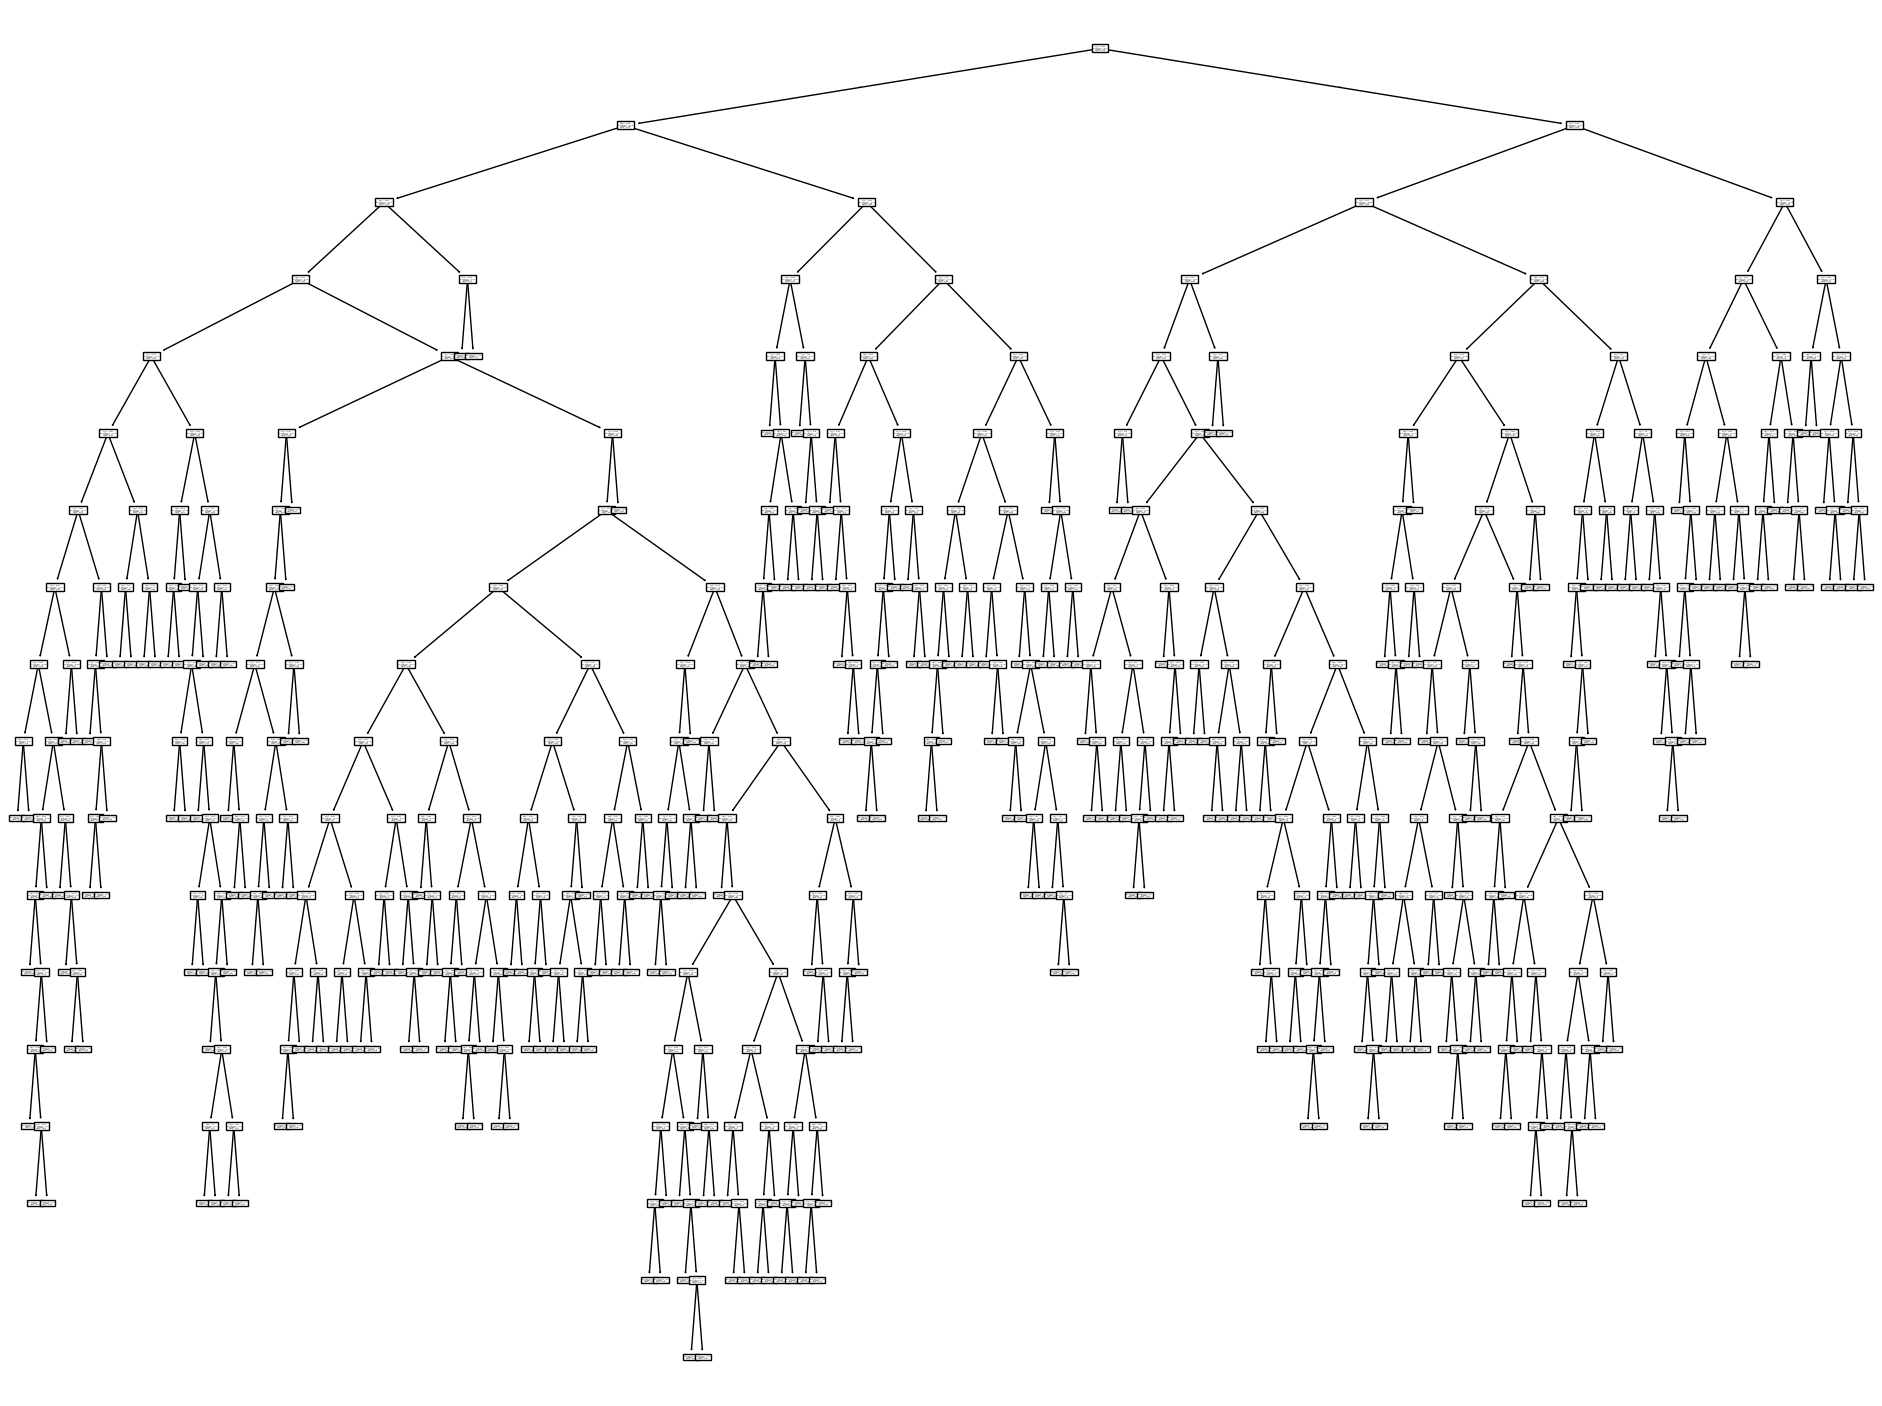

In [29]:
plt.figure(figsize=(24,18))
plot_tree(dt_reg)
plt.savefig("model.pdf")
plt.show()

### **의사 결정 트리 기반 회귀분석 모델의 정성적 및 정량적 평가 진행**

#### 원래 차원으로 복원하기 위핸 Affine Transformation 진행

In [30]:
y_test_hat = mm_scaler_y.inverse_transform(y_test_hat.reshape(-1, 1)).reshape(-1)

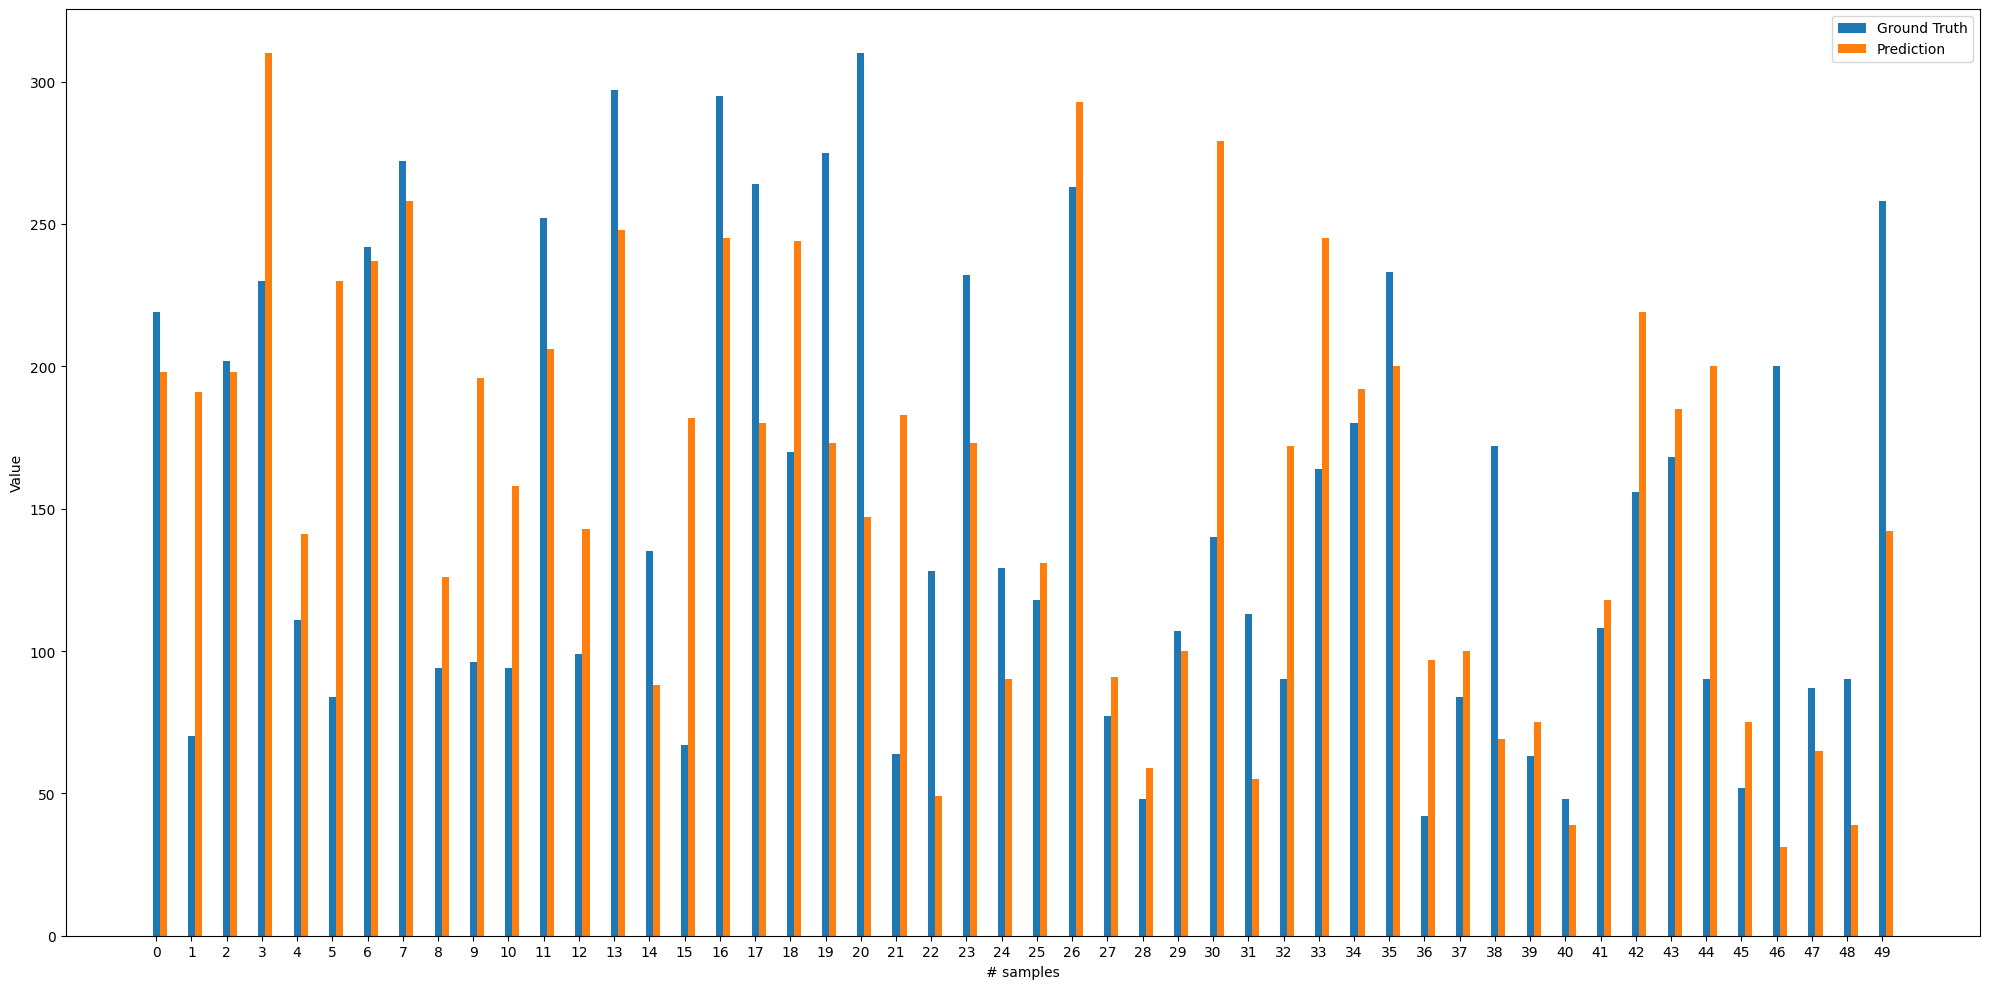

In [31]:
plot_bar_chart(y_test, y_test_hat)

In [32]:
RMSE(y_test_hat, y_test)

np.float64(73.39879739237297)

## **Random Forest (Ensemble 모델) 기반 회귀분석**

### Scikit-Learn의 **RandomForestRegressor** 활용

In [33]:
from sklearn.ensemble import RandomForestRegressor



1.   Class Instance 생성
2.   fit() Method 실행
3.   predict() Method 실행



In [34]:
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(x_train, y_train)
y_test_hat = rf_reg.predict(x_test)

### **입력 피처 (독립변수) 중요도 확인**

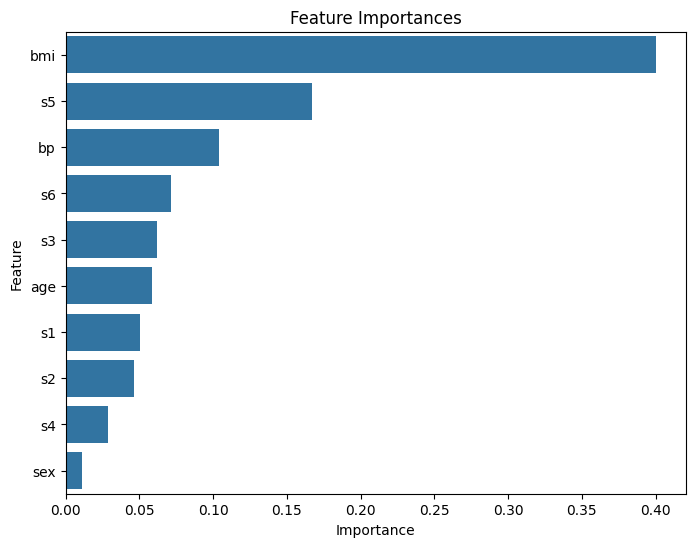

In [35]:
vis_importances(pd.Series(rf_reg.feature_importances_, index=input_feat).sort_values(ascending=False))

### **Random Forest 기반 회귀분석 모델의 정성적 및 정량적 평가 진행**

#### 원래 차원으로 복원하기 위핸 Affine Transformation 진행

In [36]:
y_test_hat = mm_scaler_y.inverse_transform(y_test_hat.reshape(-1, 1)).reshape(-1)

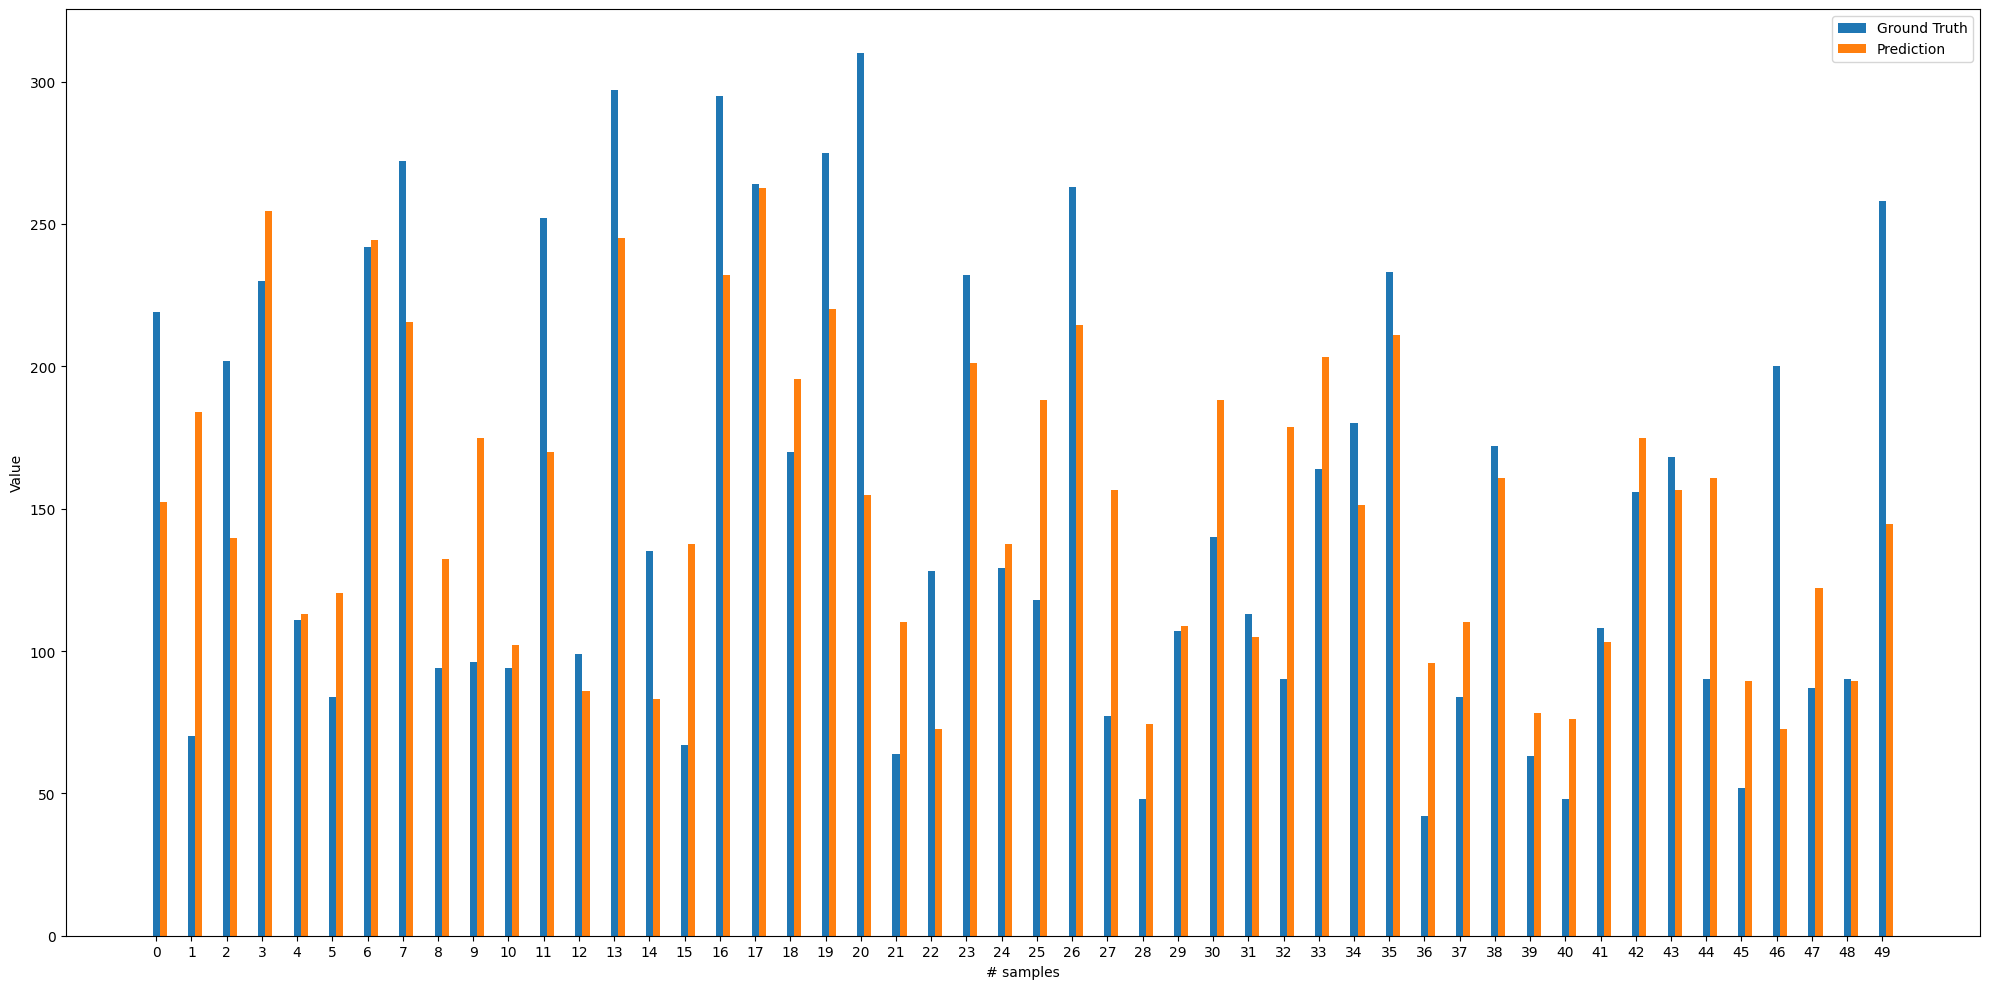

In [37]:
plot_bar_chart(y_test, y_test_hat)

In [38]:
RMSE(y_test_hat, y_test)

np.float64(53.31271210678042)